In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# calling the dataset
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# dimensions
df.shape

(891, 12)

In [4]:
# datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# checking for the Null values
100 * df.isna().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
# checking the balance of the dataset
survival_count = df["Survived"].value_counts()
survival_rate = 100*survival_count/df.shape[0]
survival_data = pd.concat([survival_count, survival_rate], axis=1).reset_index()
survival_data.columns = ['Survived', 'Count', 'Percentage']

survival_data

,Survived,Count,Percentage
0,0,549,61.616162
1,1,342,38.383838


Text(0.5, 1.0, 'Percentage Survival of the Titanic Passengers')

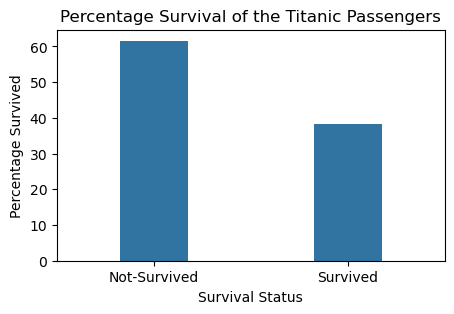

In [7]:
# plot the survival percentage
plt.figure(figsize=(5, 3))
sns.barplot(survival_data, x=['Not-Survived', 'Survived'], y='Percentage',
            width=0.35)
plt.ylabel('Percentage Survived')
plt.xlabel('Survival Status')
plt.title('Percentage Survival of the Titanic Passengers')

In [8]:
# function to show survival rate according to grps
def survival_acc_to_grp(df, colname):
    plt.figure(figsize=(5, 3))
    survival_by_pclass = df[['Survived', colname]].value_counts().reset_index()
    sns.barplot(survival_by_pclass, x=colname, y='count', hue='Survived')
    plt.ylabel('Number of Survived')
    plt.title(f'Survival According to {colname}')

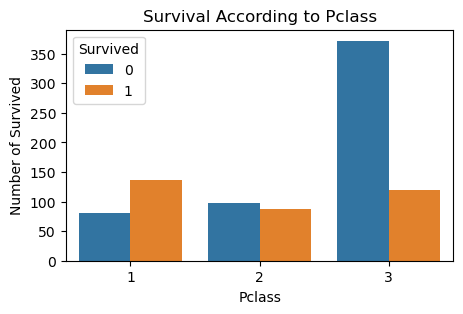

In [9]:
# survival among the Pclass
survival_acc_to_grp(df, 'Pclass')

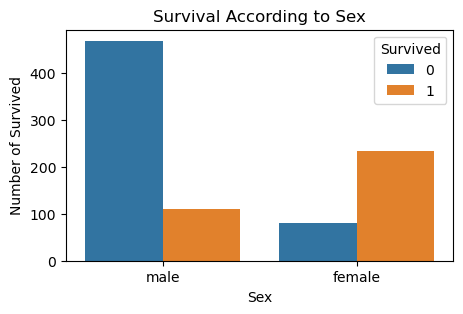

In [10]:
# survival among the Sex
survival_acc_to_grp(df, 'Sex')

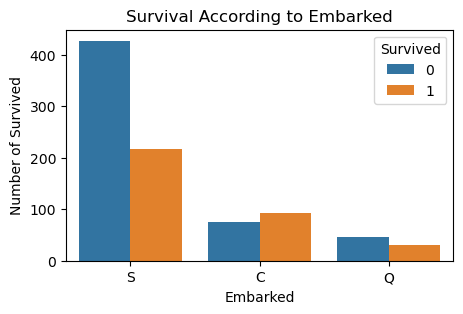

In [11]:
# survival among the Embarked
survival_acc_to_grp(df, 'Embarked')

In [12]:
# function to show distribution of variables according to survival
def vars_acc_to_surv(df, colname):
    plt.figure(figsize=(5, 3))
    sns.kdeplot(df, x=colname, hue='Survived')
    plt.title(f'{colname} distribution according to the survival')

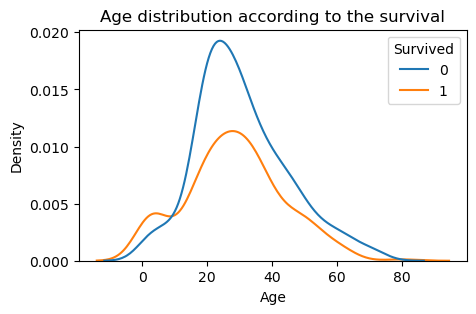

In [13]:
# age distribution according to survival status
vars_acc_to_surv(df, 'Age')

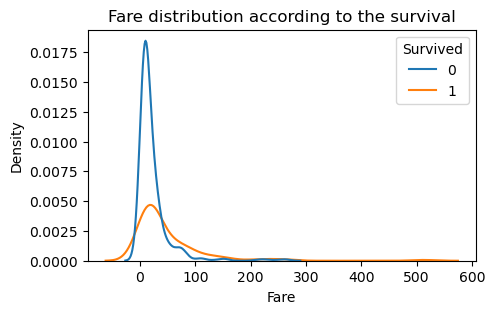

In [14]:
# fare distribution according to survival status
vars_acc_to_surv(df, 'Fare')

In [15]:
# function to visualise count data according to survival
def count_acc_to_surv(df, colname):
    plt.figure(figsize=(5, 3))
    df1 = df.groupby(['SibSp', 'Survived']).count()['PassengerId'].reset_index()
    sns.barplot(df1, x='SibSp', y='PassengerId', hue='Survived')
    plt.title(f'{colname} according to survival')
    plt.xlabel(f'{colname}')
    plt.ylabel('count')

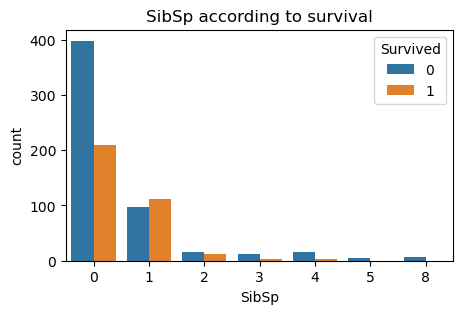

In [16]:
# SibSp distribution according to survival status
count_acc_to_surv(df, 'SibSp')

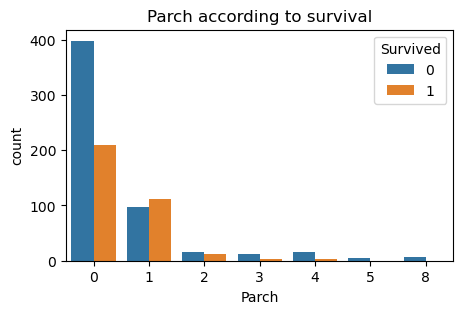

In [17]:
# Parch distribution according to survival status
count_acc_to_surv(df, 'Parch')

Text(0.5, 1.0, 'Comparison of the continuous variables')

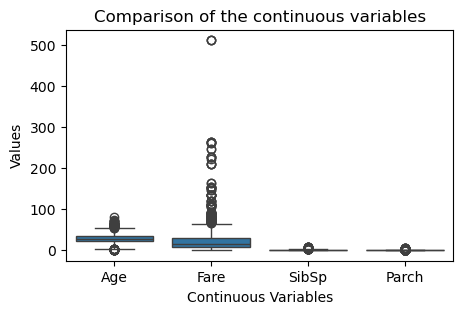

In [21]:
# variability and the location of the continuous variables
cont_vars = pd.melt(df, value_vars=['Age', 'Fare', 'SibSp', 'Parch'])
plt.figure(figsize=(5,3))
sns.boxplot(cont_vars, x='variable', y='value')
plt.xlabel('Continuous Variables')
plt.ylabel('Values')
plt.title('Comparison of the continuous variables')

In [23]:
# handling imbalance
df_survived = df[df['Survived']==1]
df_not_survived = df[df['Survived']==0]

In [25]:
df_survived_resampled = df_survived.sample(n=df_not_survived.shape[0], replace=True, random_state=101)
df_balanced = pd.concat([df_not_survived, df_survived_resampled]).sample(frac=1, random_state=26)
df_balanced

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
849,1,1,female,28.0,1,0,89.1042,C
735,0,3,male,28.5,0,0,16.1000,S
857,1,1,male,51.0,0,0,26.5500,S
336,0,1,male,29.0,1,0,66.6000,S
272,1,2,female,41.0,0,1,19.5000,S
...,...,...,...,...,...,...,...,...
354,0,3,male,28.0,0,0,7.2250,C
21,1,2,male,34.0,0,0,13.0000,S
430,1,1,male,28.0,0,0,26.5500,S
244,0,3,male,30.0,0,0,7.2250,C


In [26]:
df_balanced['Survived'].value_counts()

Survived
1    549
0    549
Name: count, dtype: int64

In [27]:
# splitting in to X and y
X = df_balanced.drop(['Survived'], axis=1)
y = df_balanced['Survived']

In [28]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1055)

print(f'''
X_train: {X_train.shape}
X_test: {X_test.shape}
y_train: {y_train.shape}
y_test: {y_test.shape}
''')


X_train: (878, 7)
X_test: (220, 7)
y_train: (878,)
y_test: (220,)



In [33]:
# preparing the model pipeline that includes
cont_cols = ['Age', 'Fare']
disc_cols = ['SibSp', 'Parch']
cat_cols = ['Pclass', 'Sex', 'Embarked']
# The following line is not needed here, df_balanced is already created above
# df_balanced = pd.concat([df_not_survived, df_survived_resampled]).sample(frac=1, random_state=26)
continuous_transformer = Pipeline(steps=[('scaler', StandardScaler())])

discrete_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(transformers=[('cont', continuous_transformer, cont_cols),('disc', discrete_transformer, disc_cols),('cat', categorical_transformer, cat_cols)])

model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LogisticRegression())])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cont',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('disc',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['SibSp', 'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', LogisticRegression())])

In [34]:
# prediction
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [35]:
# classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.87      0.76        93
           1       0.88      0.69      0.77       127

    accuracy                           0.76       220
   macro avg       0.77      0.78      0.76       220
weighted avg       0.79      0.76      0.76       220



Text(33.22222222222222, 0.5, 'Predicted Value')

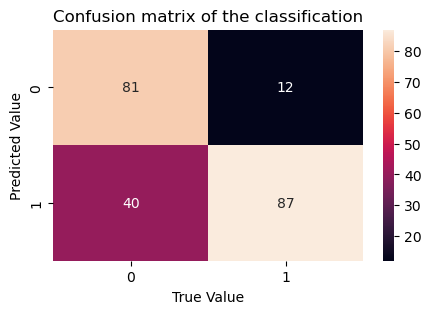

In [36]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classification')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

In [37]:
# saving the model
with open('./model_logistic.pkl', 'wb') as fp:
    pickle.dump(model, fp)